# Лабораторная работа №28 Перцептрон

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:\\Магистратура\\3\\Машинное обучение\\healthcare-dataset-stroke-data.csv', sep=',')
print(df.info(), "\n")
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None 



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# Внесение недостающих значений

med = df['bmi'].median()
print(med)
df_med = df
df_med['bmi'] = df_med['bmi'].fillna(med)

28.1


In [4]:
from sklearn.preprocessing import OrdinalEncoder

education_column = df[["work_type"]]
print(df['work_type'].unique()) #посмотрим какие виды образования присутствуют в выборке
encoder = OrdinalEncoder() # вызываем кодировщик
encoder = encoder.fit(df[['work_type']])
df['work_type'] = encoder.transform(df[['work_type']])
df

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,2.0,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,3.0,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,2.0,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,2.0,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,3.0,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,2.0,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,3.0,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,3.0,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,2.0,Rural,166.29,25.6,formerly smoked,0


In [5]:
education_column = df[["gender"]]
print(df['gender'].unique()) #посмотрим какие виды образования присутствуют в выборке
encoder = OrdinalEncoder() # вызываем кодировщик
encoder = encoder.fit(df[['gender']])
df['gender'] = encoder.transform(df[['gender']])
df

['Male' 'Female' 'Other']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,Yes,2.0,Urban,228.69,36.6,formerly smoked,1
1,51676,0.0,61.0,0,0,Yes,3.0,Rural,202.21,28.1,never smoked,1
2,31112,1.0,80.0,0,1,Yes,2.0,Rural,105.92,32.5,never smoked,1
3,60182,0.0,49.0,0,0,Yes,2.0,Urban,171.23,34.4,smokes,1
4,1665,0.0,79.0,1,0,Yes,3.0,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.0,80.0,1,0,Yes,2.0,Urban,83.75,28.1,never smoked,0
5106,44873,0.0,81.0,0,0,Yes,3.0,Urban,125.20,40.0,never smoked,0
5107,19723,0.0,35.0,0,0,Yes,3.0,Rural,82.99,30.6,never smoked,0
5108,37544,1.0,51.0,0,0,Yes,2.0,Rural,166.29,25.6,formerly smoked,0


In [6]:
education_column = df[["ever_married"]]
print(df['ever_married'].unique()) #посмотрим какие виды образования присутствуют в выборке
encoder = OrdinalEncoder() # вызываем кодировщик
encoder = encoder.fit(df[['ever_married']])
df['ever_married'] = encoder.transform(df[['ever_married']])
df

['Yes' 'No']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1.0,2.0,Urban,228.69,36.6,formerly smoked,1
1,51676,0.0,61.0,0,0,1.0,3.0,Rural,202.21,28.1,never smoked,1
2,31112,1.0,80.0,0,1,1.0,2.0,Rural,105.92,32.5,never smoked,1
3,60182,0.0,49.0,0,0,1.0,2.0,Urban,171.23,34.4,smokes,1
4,1665,0.0,79.0,1,0,1.0,3.0,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.0,80.0,1,0,1.0,2.0,Urban,83.75,28.1,never smoked,0
5106,44873,0.0,81.0,0,0,1.0,3.0,Urban,125.20,40.0,never smoked,0
5107,19723,0.0,35.0,0,0,1.0,3.0,Rural,82.99,30.6,never smoked,0
5108,37544,1.0,51.0,0,0,1.0,2.0,Rural,166.29,25.6,formerly smoked,0


In [7]:
education_column = df[["Residence_type"]]
print(df['Residence_type'].unique()) #посмотрим какие виды образования присутствуют в выборке
encoder = OrdinalEncoder() # вызываем кодировщик
encoder = encoder.fit(df[['Residence_type']])
df['Residence_type'] = encoder.transform(df[['Residence_type']])
df

['Urban' 'Rural']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,formerly smoked,1
1,51676,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.1,never smoked,1
2,31112,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,never smoked,1
3,60182,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,smokes,1
4,1665,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.0,80.0,1,0,1.0,2.0,1.0,83.75,28.1,never smoked,0
5106,44873,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.0,never smoked,0
5107,19723,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.6,never smoked,0
5108,37544,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.6,formerly smoked,0


In [8]:
education_column = df[["smoking_status"]]
print(df['smoking_status'].unique()) #посмотрим какие виды образования присутствуют в выборке
encoder = OrdinalEncoder() # вызываем кодировщик
encoder = encoder.fit(df[['smoking_status']])
df['smoking_status'] = encoder.transform(df[['smoking_status']])
df

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
1,51676,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.1,2.0,1
2,31112,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,60182,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,1665,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.0,80.0,1,0,1.0,2.0,1.0,83.75,28.1,2.0,0
5106,44873,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.0,2.0,0
5107,19723,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.6,2.0,0
5108,37544,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.6,1.0,0


In [23]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:11]
y = df["stroke"]
print(X)
sc = StandardScaler()
X = sc.fit_transform(X)

# df['stroke'].value_counts()

         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046     1.0  67.0             0              1           1.0   
1     51676     0.0  61.0             0              0           1.0   
2     31112     1.0  80.0             0              1           1.0   
3     60182     0.0  49.0             0              0           1.0   
4      1665     0.0  79.0             1              0           1.0   
...     ...     ...   ...           ...            ...           ...   
5105  18234     0.0  80.0             1              0           1.0   
5106  44873     0.0  81.0             0              0           1.0   
5107  19723     0.0  35.0             0              0           1.0   
5108  37544     1.0  51.0             0              0           1.0   
5109  44679     0.0  44.0             0              0           1.0   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  
0           2.0             1.0             228.69  36.6    

In [20]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [22]:
X

array([[-1.29831203,  1.18807255,  1.05143428, ...,  2.70637544,
         1.00508597, -0.35178071],
       [ 0.71637149, -0.840344  ,  0.78607007, ...,  2.12155854,
        -0.09898092,  0.58155233],
       [-0.25547819,  1.18807255,  1.62639008, ..., -0.0050283 ,
         0.47253605,  0.58155233],
       ...,
       [-0.79371959, -0.840344  , -0.36384151, ..., -0.51144264,
         0.22574463,  0.58155233],
       [ 0.04849658,  1.18807255,  0.34379639, ...,  1.32825706,
        -0.42370648, -0.35178071],
       [ 0.38569496, -0.840344  ,  0.03420481, ..., -0.46086746,
        -0.34577235, -1.28511375]])

Неверно классифицированные образцы: 93
Точность: 0.94


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

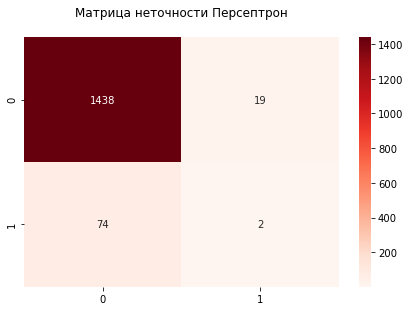

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

ppn = Perceptron(max_iter=10000, random_state=0)
ppn.fit(X_train,y_train)
y1 = ppn.predict(X_test) 
print('Неверно классифицированные образцы: %d' % (y_test != y1).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

Неверно классифицированные образцы: 86
Точность: 0.94


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

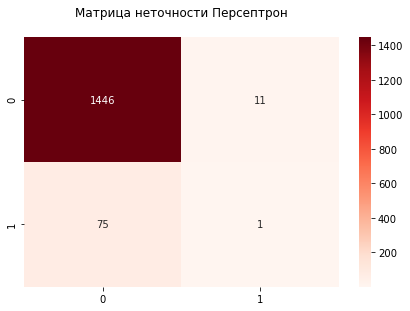

In [16]:
# Многослойный персептрон
mlp= MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=10000, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test != mlp_pred).sum())
print('Точность: %.2f' % accuracy_score(y_test, mlp_pred))

# матрица неточности
cnf_matrix_log = confusion_matrix(y_test, mlp_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

In [17]:
# ROC

y_score = ppn.predict(X_test)
y_score

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

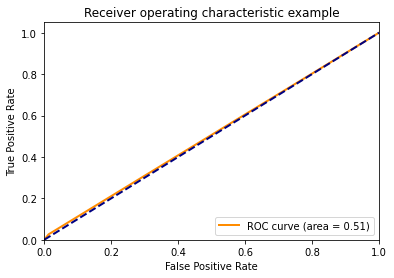

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [24]:
y_score = mlp.predict(X_test)
y_score

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

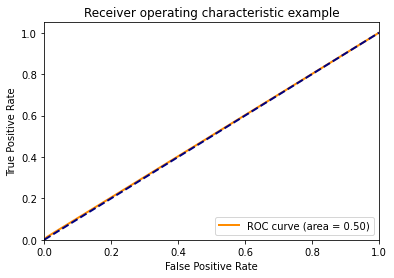

In [25]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,[1, 2, 3, 4, 8, 9]]
y = df["stroke"]
X

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1.0,67.0,0,1,228.69,36.6
1,0.0,61.0,0,0,202.21,28.1
2,1.0,80.0,0,1,105.92,32.5
3,0.0,49.0,0,0,171.23,34.4
4,0.0,79.0,1,0,174.12,24.0
...,...,...,...,...,...,...
5105,0.0,80.0,1,0,83.75,28.1
5106,0.0,81.0,0,0,125.20,40.0
5107,0.0,35.0,0,0,82.99,30.6
5108,1.0,51.0,0,0,166.29,25.6


In [28]:
sc = StandardScaler()
X = sc.fit_transform(X)

Неверно классифицированные образцы: 138
Точность: 0.91


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

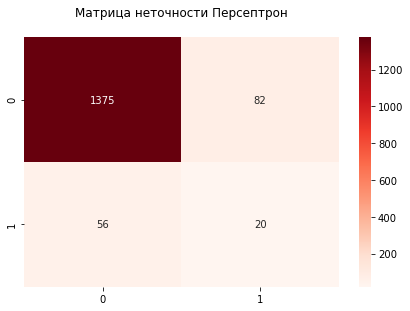

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

ppn = Perceptron(max_iter=10000, random_state=0)
ppn.fit(X_train,y_train)
y1 = ppn.predict(X_test) 
print('Неверно классифицированные образцы: %d' % (y_test != y1).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

Неверно классифицированные образцы: 76
Точность: 0.95


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

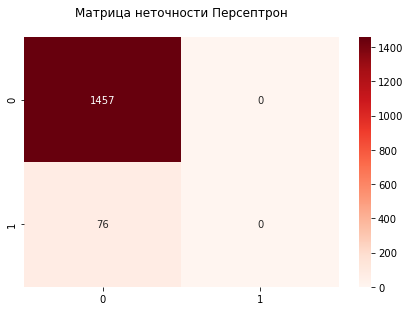

In [30]:
# Многослойный персептрон
mlp= MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=10000, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test != mlp_pred).sum())
print('Точность: %.2f' % accuracy_score(y_test, mlp_pred))

# матрица неточности
cnf_matrix_log = confusion_matrix(y_test, mlp_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

In [31]:
# ROC

y_score = ppn.predict(X_test)
y_score

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

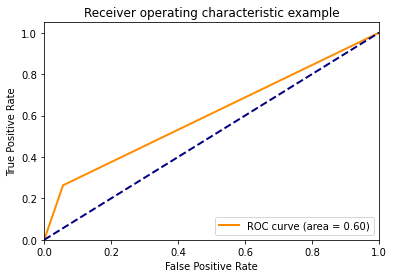

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [33]:
# ROC

y_score = mlp.predict(X_test)
y_score

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

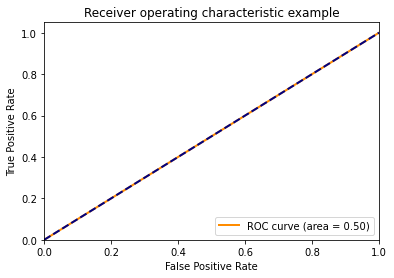

In [34]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()